In [1]:
%pylab inline
import sys
from scipy.interpolate import interp1d
sys.path.append('../../MW-LMC-SCF/code/')
from coefficients_smoothing import get_coefficients

Populating the interactive namespace from numpy and matplotlib


In [205]:
import gala.potential as gp
import gala.integrate as gi
from gala.units import UnitSystem
import gala.dynamics as gd
import astropy.units as u

In [3]:
coeff_path = '/home/xzk/work/github/time-dependent-BFE/data/MWLMC5_MW/BFE_MWLMC5_b1snap_'
snap1 = 0
snap2 = 110
init_time= snap1*0.02
max_time = snap2*0.02
sn_cut = 5
m_mw = 1.8e-6
m_lmc = 1.5e-6

In [4]:
S_all = np.zeros((snap2, 21, 21, 21))
T_all = np.zeros((snap2, 21, 21, 21))

for i in range(snap2):
    S_all[i], T_all[i], N = get_coefficients('LMC5', 'radial', 'MW', i, sn_cut, m_mw)

../../MW-LMC-SCF/code/coefficients_smoothing.py:128: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


In [5]:
S_lmc = np.zeros((snap2, 21, 21, 21))
T_lmc = np.zeros((snap2, 21, 21, 21))

for i in range(snap2):
    S_lmc[i], T_lmc[i], N = get_coefficients('LMC5', 'radial', 'LMC', i, sn_cut, m_lmc)

../../MW-LMC-SCF/code/coefficients_smoothing.py:128: RuntimeWarning: divide by zero encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


In [6]:
np.savetxt('LMC_HO_coefficients.txt', np.array([S_lmc.flatten(), T_lmc.flatten()]).T)

In [7]:
shape(S_all)

(110, 21, 21, 21)

<ipython-input-8-d7bf21a0d691>:1: RuntimeWarning: divide by zero encountered in log10
  imshow(np.log10(np.abs(S_lmc[109][:,:,0].T)), origin='lower')


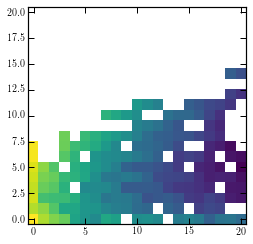

In [8]:
imshow(np.log10(np.abs(S_lmc[109][:,:,0].T)), origin='lower')

In [9]:
plot([S_lmc[i][0,0,0] for i in range(110)])

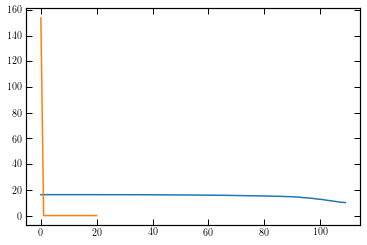

In [10]:
plot(S_all[:][0,0,0])

In [11]:
data = np.loadtxt('../../MW_anisotropy/data/orbits/LMC5_100Mb1_orbit.txt')

x_mw = data[:111,0]
y_mw = data[:111,1]
z_mw = data[:111,2]
r_mw = np.array([x_mw, y_mw, z_mw])

x_lmc = data[:111,6] - data[:111,0]
y_lmc = data[:111,7] - data[:111,1]
z_lmc = data[:111,8] - data[:111,2]

In [12]:
r_mw_r = np.array([x_mw[:110]-x_mw[1:111], y_mw[:110]-y_mw[1:111], z_mw[0:110]-z_mw[1:111]]).T
r_lmc_r = np.array([x_lmc[:110]-x_mw[:110], y_lmc[:110]-y_mw[:110], z_lmc[:110]-z_mw[:110]]).T

In [13]:
times = np.arange(0, 110*0.02, 0.02)

In [14]:
len(r_lmc_r[:,0])

110

In [17]:
#np.savetxt('MW_LMC_com_times.txt', np.array([r_mw[0][:-1], r_mw[1][:-1], r_mw[2][:-1], 
#                                             r_lmc_r[:,0], r_lmc_r[:,1], r_lmc_r[:,2], 
#                                             times]).T, 
#           header='xcom_mw, ycom_mw, zcom_mw, xcom_lmc, ycom_lmc, zcom_lmc, times')

In [25]:
# BFE static at the present time

In [490]:
def orbit_plot(orbit):
    fig, ax = plt.subplots(1, 3, figsize=(14, 4))
    ax[0].plot(orbit.x, orbit.y, label='mw+lmc')

    ax[1].plot(orbit.x, orbit.z)


    ax[2].plot(orbit.y, orbit.z)


    ax[0].set_xlabel(r'$x[kpc]$')
    ax[0].set_ylabel(r'$y[kpc]$')

    ax[1].set_xlabel(r'$x[kpc]$')
    ax[1].set_ylabel(r'$z[kpc]$')

    ax[2].set_xlabel(r'$y[kpc]$')
    ax[2].set_ylabel(r'$z[kpc]$')

    ax[0].legend(fontsize=15)
    
    return ax

In [325]:
320/40.85

7.833537331701346

In [211]:
from gala.units import galactic, solarsystem, dimensionless

In [336]:
galactic

<UnitSystem (kpc,Myr,solMass,rad)>

In [448]:
mw_halo_hern = gp.HernquistPotential(m=1E12*u.Msun, c=10*u.kpc, 
                                     units=[u.kpc, u.Gyr, u.Msun, u.radian])

In [445]:
r_mw.T[-1]

array([ 9.201964, 42.087723, -3.3225  ])

In [455]:
mw_t0 = gp.scf.SCFPotential(m=1e10, r_s=40.85, Snlm=S_all[0], Tnlm=T_all[0],
                           units=[u.kpc, u.Gyr, u.Msun, u.radian])

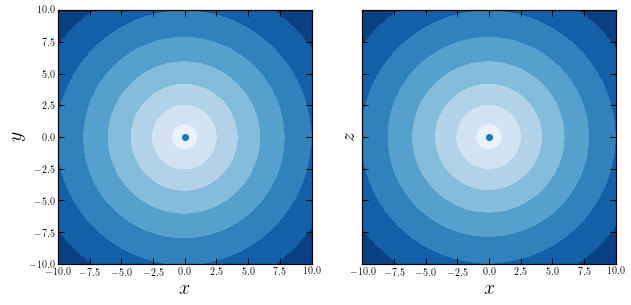

In [456]:
grid = np.linspace(-10, 10, 128)

fig, axes = plt.subplots(1, 2, figsize=(10, 5),
                         sharex=True, sharey=True)
_ = mw_t0.plot_contours((grid, grid, 0), ax=axes[0])
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$y$')

_ = mw_t0.plot_contours((grid, 0, grid), ax=axes[1])
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$z$')

axes[0].scatter(0,0)
axes[1].scatter(0,0)


for ax in axes:
    ax.set_aspect('equal')

In [457]:
w0 = gd.PhaseSpacePosition(pos=[100, 0, 0]*u.kpc,
                           vel=[0, 220, 0]*u.km/u.s)

In [458]:
orbit_mw_t0 = gp.Hamiltonian(mw_t0).integrate_orbit(w0, dt=0.01*u.Gyr, n_steps=1000)
orbit_mw_halo = gp.Hamiltonian(mw_halo_hern).integrate_orbit(w0, dt=0.01*u.Gyr, n_steps=1000)

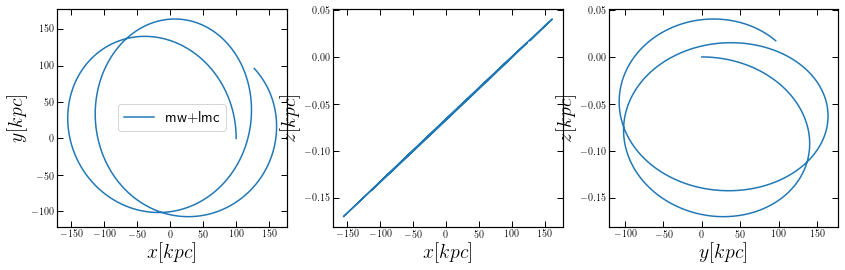

In [453]:
orbit_plot(orbit_mw_t0)

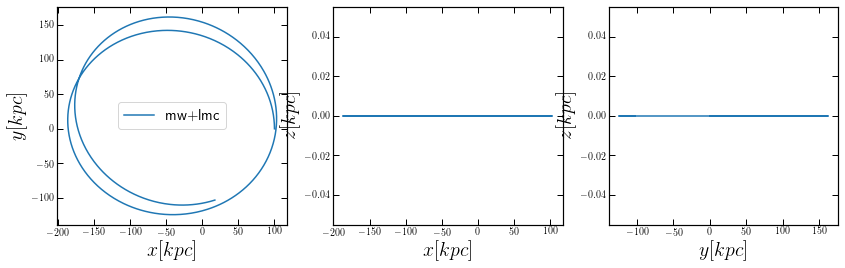

In [454]:
orbit_plot(orbit_mw_halo)

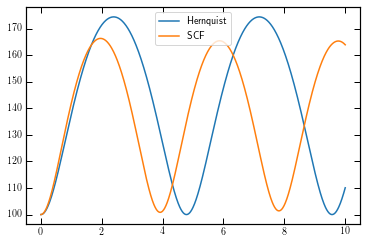

In [420]:
plt.plot(orbit_mw_halo.t, orbit_mw_halo.spherical.distance, marker='None', label='Hernquist')
plt.plot(orbit_mw_t0.t, orbit_mw_t0.spherical.distance, marker='None', label='SCF')
plt.legend()

In [459]:
mw_t_r0 = gp.scf.InterpolatedSCFPotential(m=1e10, r_s=40.85, Sjnlm=S_all, Tjnlm=T_all, tj=times,
                                          units=[u.kpc, u.Gyr, u.Msun, u.radian])

mw_t = gp.scf.InterpolatedSCFPotential(m=1e10, r_s=40.85, Sjnlm=S_all, Tjnlm=T_all, tj=times,
                                     originj=r_mw, units=[u.kpc, u.Gyr, u.Msun, u.radian])

lmc_t = gp.scf.InterpolatedSCFPotential(m=1e10, r_s=25, Sjnlm=S_lmc, Tjnlm=T_lmc, tj=times, 
                                      originj=r_lmc_r, units=[u.kpc, u.Gyr, u.Msun, u.radian])


In [466]:
len(times)

110

In [478]:
mwlmc_bfe = gp.CCompositePotential(mw=mw_t, lmc=lmc_t)

In [21]:
w0 = gd.PhaseSpacePosition(pos=[25.4, -24, -71]*u.kpc,
                           vel=[-67., -165, 162.7]*u.km/u.s)

In [512]:
cc =  208/40.85
cc

5.091799265605875

In [510]:
mw_halo_hern = gp.HernquistPotential(m=1.03E12*u.Msun, c=cc*u.kpc, 
                                     units=[u.kpc, u.Gyr, u.Msun, u.radian])

In [507]:
orbit_mw_halo = gp.Hamiltonian(mw_halo_hern).integrate_orbit(w0, dt=0.01*u.Gyr, n_steps=220)

In [486]:
orbit_mwt = gp.Hamiltonian(mw_t).integrate_orbit(w0, dt=0.01*u.Gyr, n_steps=220)

In [487]:
orbit_mwt_r0 = gp.Hamiltonian(mw_t_r0).integrate_orbit(w0, dt=0.01*u.Gyr, n_steps=220)

In [488]:
orbit_mwlmc = gp.Hamiltonian(mwlmc_bfe).integrate_orbit(w0, dt=0.01*u.Gyr, n_steps=220)

orbit_mw_t0 = gp.Hamiltonian(mw_t0).integrate_orbit(w0, dt=0.01*u.Gyr, n_steps=220)


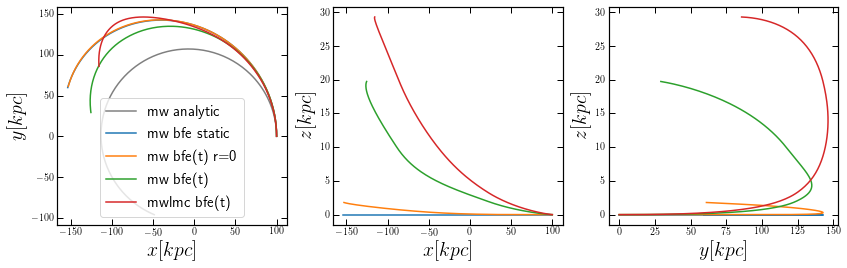

In [511]:
#orbit_plot(orbit_mw_t0)
#orbit_plot(orbit_mwt_r0)
#orbit_plot(orbit_mwt)
#orbit_plot(orbit_mwlmc)


fig, ax = plt.subplots(1, 3, figsize=(14, 4))
ax[0].plot(orbit_mw_halo.x, orbit_mw_halo.y, c='k', alpha=0.5, label='mw analytic')
ax[0].plot(orbit_mw_t0.x, orbit_mw_t0.y, label='mw bfe static')
ax[0].plot(orbit_mwt_r0.x, orbit_mwt_r0.y, label='mw bfe(t) r=0')
ax[0].plot(orbit_mwt.x, orbit_mwt.y, label='mw bfe(t)')
ax[0].plot(orbit_mwlmc.x, orbit_mwlmc.y, label='mwlmc bfe(t)')

ax[1].plot(orbit_mw_t0.x, orbit_mw_t0.z)
ax[1].plot(orbit_mwt_r0.x, orbit_mwt_r0.z)
ax[1].plot(orbit_mwt.x, orbit_mwt.z)
ax[1].plot(orbit_mwlmc.x, orbit_mwlmc.z)


ax[2].plot(orbit_mw_t0.y, orbit_mw_t0.z)
ax[2].plot(orbit_mwt_r0.y, orbit_mwt_r0.z)
ax[2].plot(orbit_mwt.y, orbit_mwt.z)
ax[2].plot(orbit_mwlmc.y, orbit_mwlmc.z)


ax[0].set_xlabel(r'$x[kpc]$')
ax[0].set_ylabel(r'$y[kpc]$')

ax[1].set_xlabel(r'$x[kpc]$')
ax[1].set_ylabel(r'$z[kpc]$')

ax[2].set_xlabel(r'$y[kpc]$')
ax[2].set_ylabel(r'$z[kpc]$')

ax[0].legend(fontsize=15)

In [ ]:
## Todo find henrquist right scale length of match the bfe

9
19
29
39
49
59
69
79
89
99
109


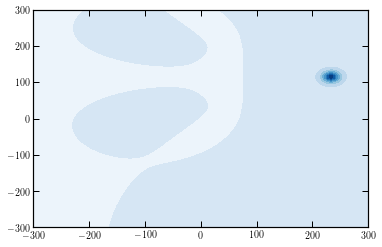

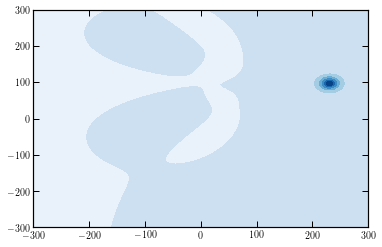

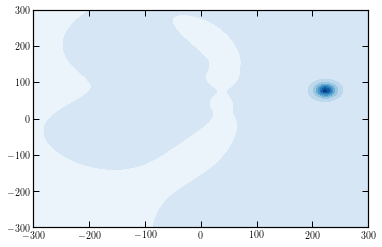

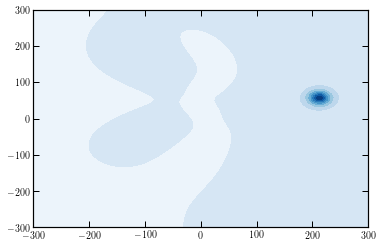

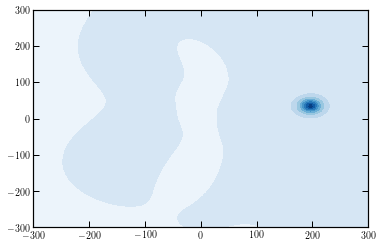

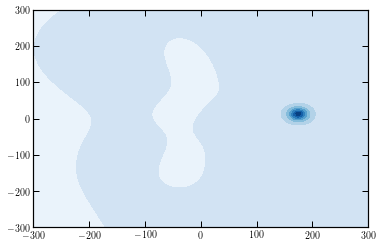

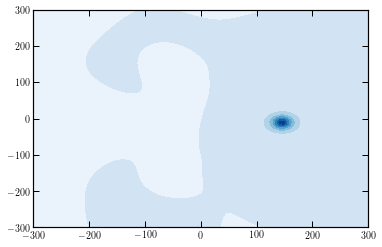

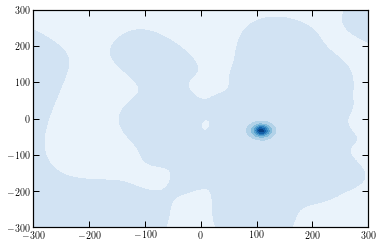

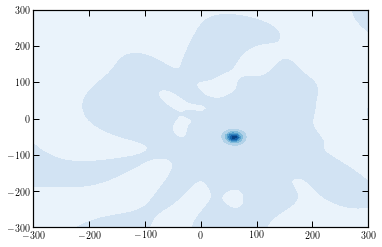

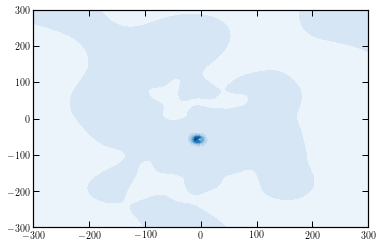

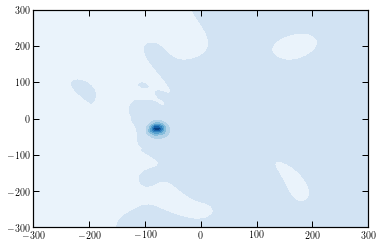

In [433]:
for i in range(9, 110, 10):
    print(i)
    lmc = gp.scf.SCFPotential(m=1, r_s=25, Snlm=S_lmc[i], Tnlm=T_lmc[i], origin=r_lmc_r[i], 
                              units=[u.kpc, u.Gyr, u.Msun, u.radian])
    grid = np.linspace(-300.,300.,100)
    lmc.plot_density_contours(grid=(0, grid, grid))
